# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [297]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [299]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [301]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [303]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [305]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.5,99,1.0
1,2023-01-01T01:00,10.4,98,0.1
2,2023-01-01T02:00,10.3,96,0.0
3,2023-01-01T03:00,9.7,95,0.0
4,2023-01-01T04:00,9.0,95,0.0


In [307]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [309]:
# Handle missing values (if any)
df.ffill()  # Forward fill

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,10.5,99,1.0
2023-01-01 01:00:00,10.4,98,0.1
2023-01-01 02:00:00,10.3,96,0.0
2023-01-01 03:00:00,9.7,95,0.0
2023-01-01 04:00:00,9.0,95,0.0
...,...,...,...
2023-01-07 19:00:00,3.8,64,0.0
2023-01-07 20:00:00,3.3,66,0.0
2023-01-07 21:00:00,2.4,72,0.0


In [311]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


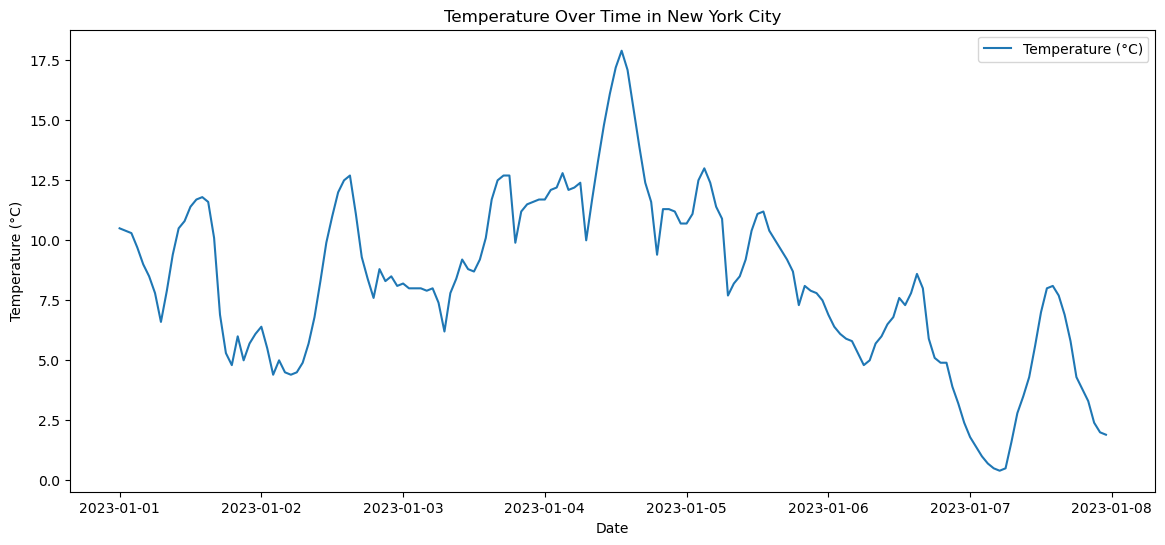

In [313]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

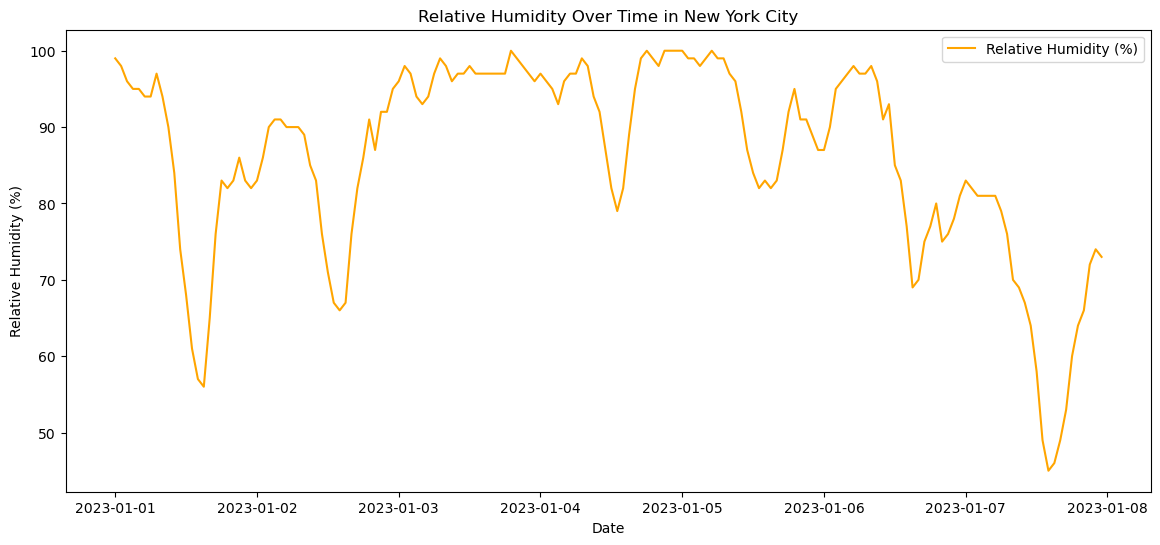

In [315]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


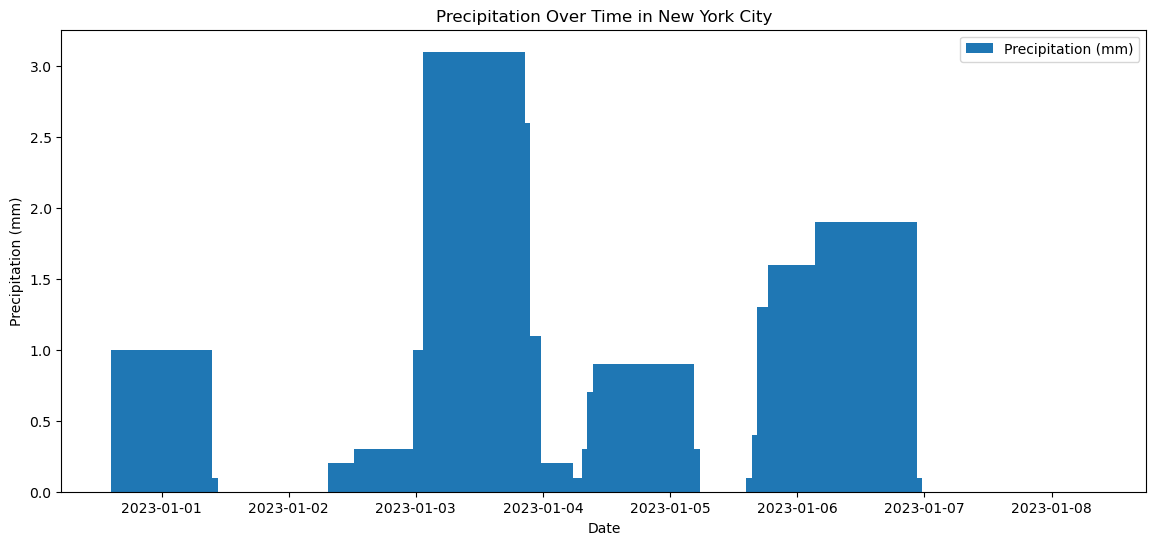

In [317]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [319]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


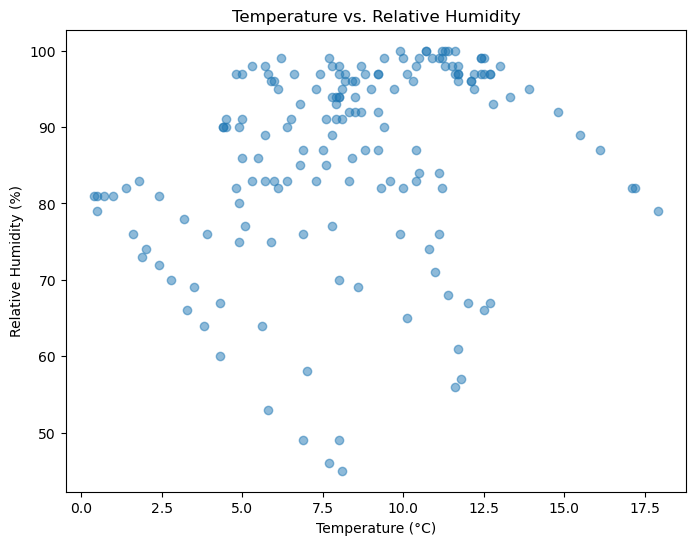

In [321]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [323]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.658333,83.000000,0.045833
2023-01-02,7.858333,84.000000,0.025000
2023-01-03,9.558333,96.916667,0.391667
2023-01-04,12.954167,94.333333,0.095833
2023-01-05,9.783333,92.125000,0.000000


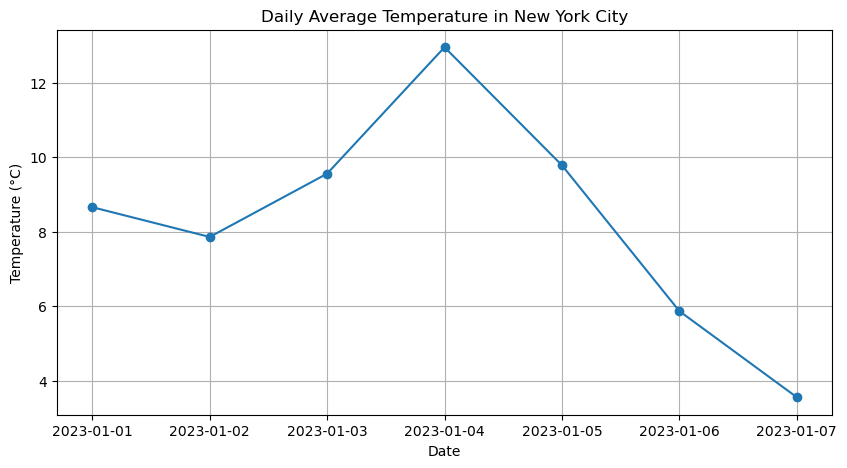

In [325]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [327]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01 00:00:00,13.3,92,2.0
2023-01-01 01:00:00,13.2,93,0.7
2023-01-01 02:00:00,12.4,94,0.0
2023-01-01 03:00:00,11.1,94,0.0
2023-01-01 04:00:00,10.8,94,0.0
...,...,...,...
2023-01-07 19:00:00,13.4,73,0.0
2023-01-07 20:00:00,11.3,83,0.0
2023-01-07 21:00:00,10.4,80,0.0


In [329]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [331]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


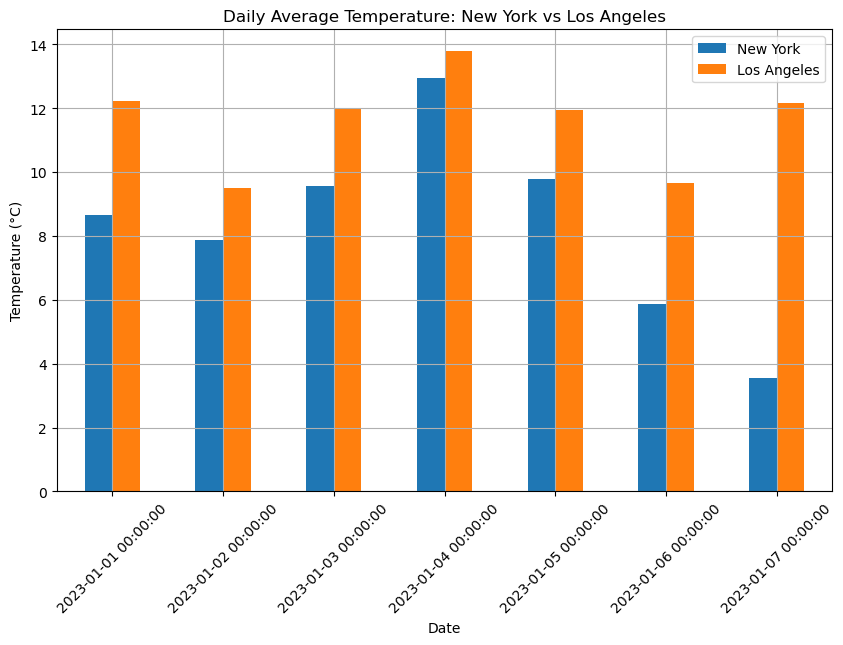

In [333]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [335]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.658333,12.233333,3.575000
2023-01-02,7.858333,9.495833,1.637500
2023-01-03,9.558333,11.970833,2.412500
2023-01-04,12.954167,13.775000,0.820833
2023-01-05,9.783333,11.950000,2.166667
2023-01-06,5.866667,9.662500,3.795833
2023-01-07,3.554167,12.154167,8.600000


In [337]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [339]:
# location coordinates for London and Seattle
latitude_l = 51.5074
longitude_l = -0.1278
latitude_s = 47.6062
longitude_s = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'

# Variable to fetch
hourly_precipitation = ['precipitation']

In [341]:
# Make the API Request for London
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_l = {
    'latitude': latitude_l,
    'longitude': longitude_l,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': hourly_precipitation,
    'timezone': 'Europe/London'
}

response_l = requests.get(base_url, params=params_l)

In [343]:
# check if the request was successful
if response_l.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_l.status_code}')

Data fetched successfully!


In [345]:
# Make the API Request for Seattle
params_s = {
    'latitude': latitude_s,
    'longitude': longitude_s,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': hourly_precipitation,
    'timezone': 'America/Los_Angeles'
}

response_s = requests.get(base_url, params=params_s)

In [346]:
# check if the request was successful
if response_s.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_s.status_code}')

Data fetched successfully!


In [349]:
# Load London Data into pandas DataFrame
data_l = response_l.json()
hourly_data_l = data_l['hourly']

df_l = pd.DataFrame(hourly_data_l)
df_l.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [351]:
# Load Seattle Data into pandas DataFrame
data_s = response_s.json()
hourly_data_s = data_s['hourly']

df_s = pd.DataFrame(hourly_data_s)
df_s.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [353]:
# Data Cleaning
# Convert 'time' column to datetime
df_l['time'] = pd.to_datetime(df_l['time'])
df_s['time'] = pd.to_datetime(df_s['time'])

# Set 'time' as the index
df_l.set_index('time', inplace=True)
df_s.set_index('time', inplace=True)

# check for London missing values
df_l.isnull().sum()

precipitation    0
dtype: int64

In [355]:
# check for Seattle missing values
df_s.isnull().sum()

precipitation    0
dtype: int64

In [357]:
# Handle London missing values (if any)
df_l.ffill()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0
...,...
2022-12-31 19:00:00,0.0
2022-12-31 20:00:00,0.0
2022-12-31 21:00:00,0.0


In [359]:
# Handle Seattle missing values (if any)
df_s.ffill()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0
...,...
2022-12-31 19:00:00,0.0
2022-12-31 20:00:00,0.0
2022-12-31 21:00:00,0.0


In [361]:
# Resample London Hourly Data to Weekly Totals
weekly_total_l = df_l.resample('W').sum()
weekly_total_l.head()

,precipitation
time,
2022-01-02,2.2
2022-01-09,12.9
2022-01-16,3.1
2022-01-23,0.0
2022-01-30,0.4


In [363]:
# Resample Seattle Hourly Data to Weekly Totals
weekly_total_s = df_s.resample('W').sum()
weekly_total_s.head()

,precipitation
time,
2022-01-02,38.3
2022-01-09,101.8
2022-01-16,45.5
2022-01-23,15.7
2022-01-30,6.6


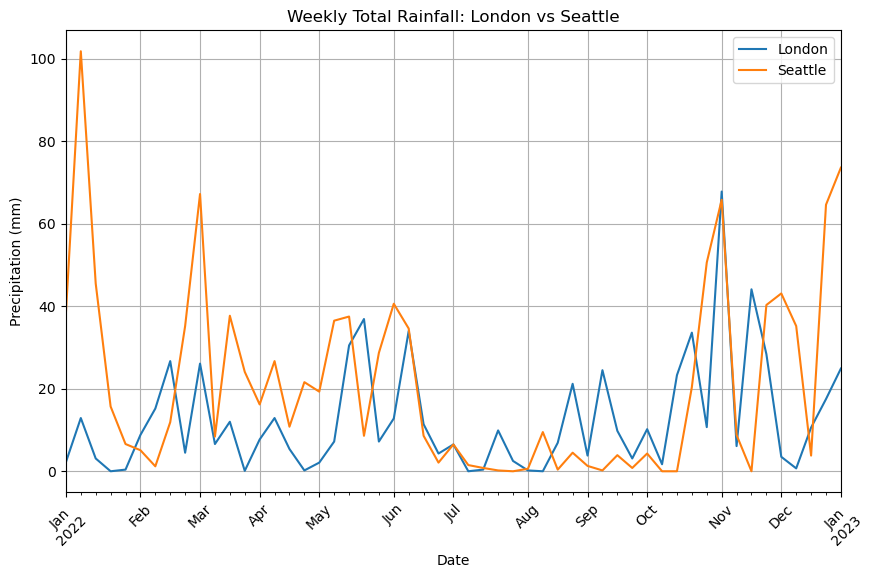

In [371]:
# Plot Weekly Total Rainfall for London and Seattle
combined_precipitation = pd.DataFrame({
    'London': weekly_total_l['precipitation'],
    'Seattle': weekly_total_s['precipitation']
})
combined_precipitation.plot(kind='line', figsize=(10, 6))
plt.title('Weekly Total Rainfall: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [391]:
# Calculate Temperature Difference
combined_precipitation['Precipitation Difference'] = combined_precipitation['London'] - combined_precipitation['Seattle']
combined_precipitation

,London,Seattle,Precipitation Difference
time,,,
2022-01-02,2.2,38.3,-36.1
2022-01-09,12.9,101.8,-88.9
2022-01-16,3.1,45.5,-42.4
2022-01-23,0.0,15.7,-15.7
2022-01-30,0.4,6.6,-6.2
2022-02-06,8.8,5.1,3.7
2022-02-13,15.2,1.2,14.0
2022-02-20,26.7,11.9,14.8
2022-02-27,4.5,35.2,-30.7


In [393]:
# Calculate total Rainfall for London
weekly_total_l.sum()

precipitation    663.1
dtype: float64

In [395]:
# Calculate total Rainfall for Seattle
weekly_total_s.sum()

precipitation    1131.2
dtype: float64

In [397]:
# Save Data to CSV
# Save London data
df.to_csv('london_weather.csv')

# Save Seattle data
df_la.to_csv('seattle_weather.csv')

In [387]:
## Analysis
## Seattle had more rainfall overall in 2022 (1131 mm) compared to London (663 mm). 
## An interesting pattern I observed is the relatively high amount of rainfall that Seattle receives around January and December.
## I also noticed that London receives more rainfall than Seattle between the months of July and November.